### Common Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import tracemalloc

In [2]:
seed = 58

### Preprocessing

In [3]:
bank_df = pd.read_csv("bank.csv", delimiter = ";")

In [4]:
bank = bank_df.copy()

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.shape

(41188, 21)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Dropping attribute "duration" as the metadata provided suggested that this attribute highly affects the output variable and should be removed from the data before using it for predictive modelling.

In [9]:
bank = bank.drop("duration", axis = 1)

### Numerical Attributes

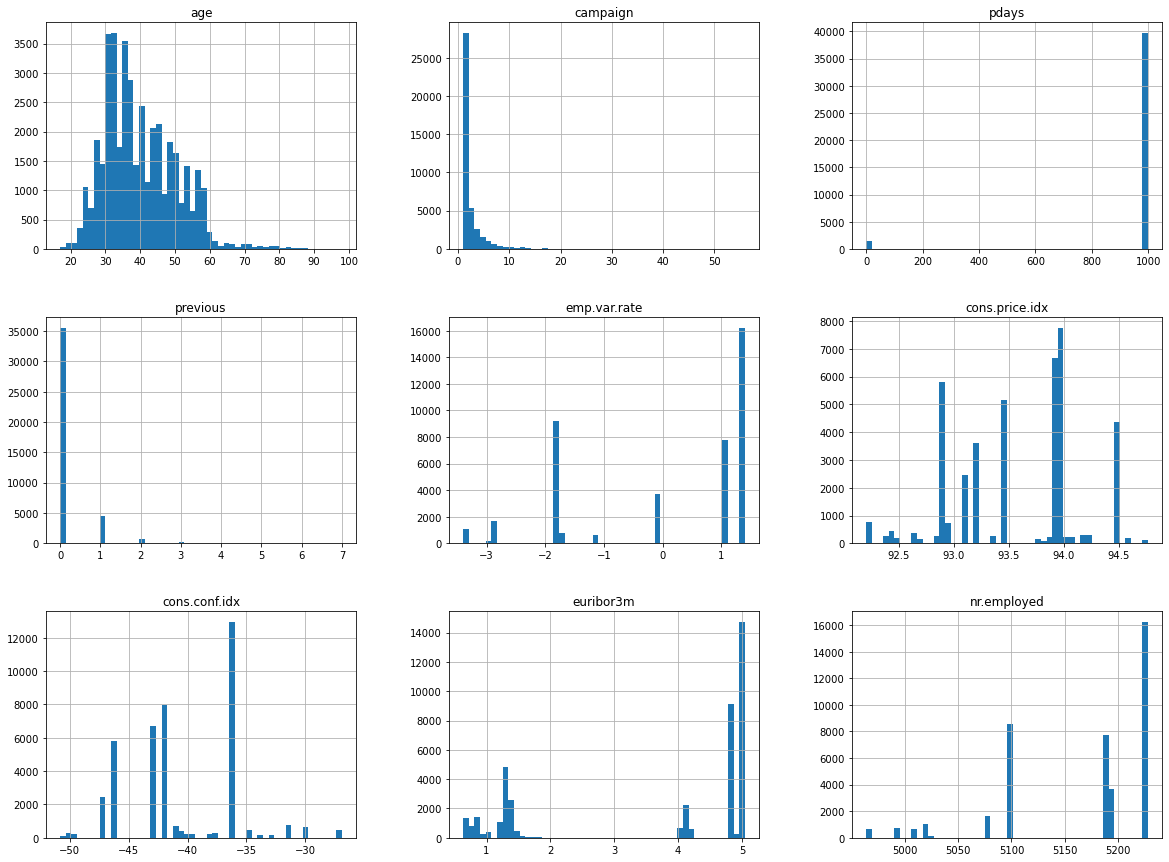

In [10]:
%matplotlib inline

bank.hist(bins = 50, figsize = (20, 15))
plt.show()

### Categorical Attributes

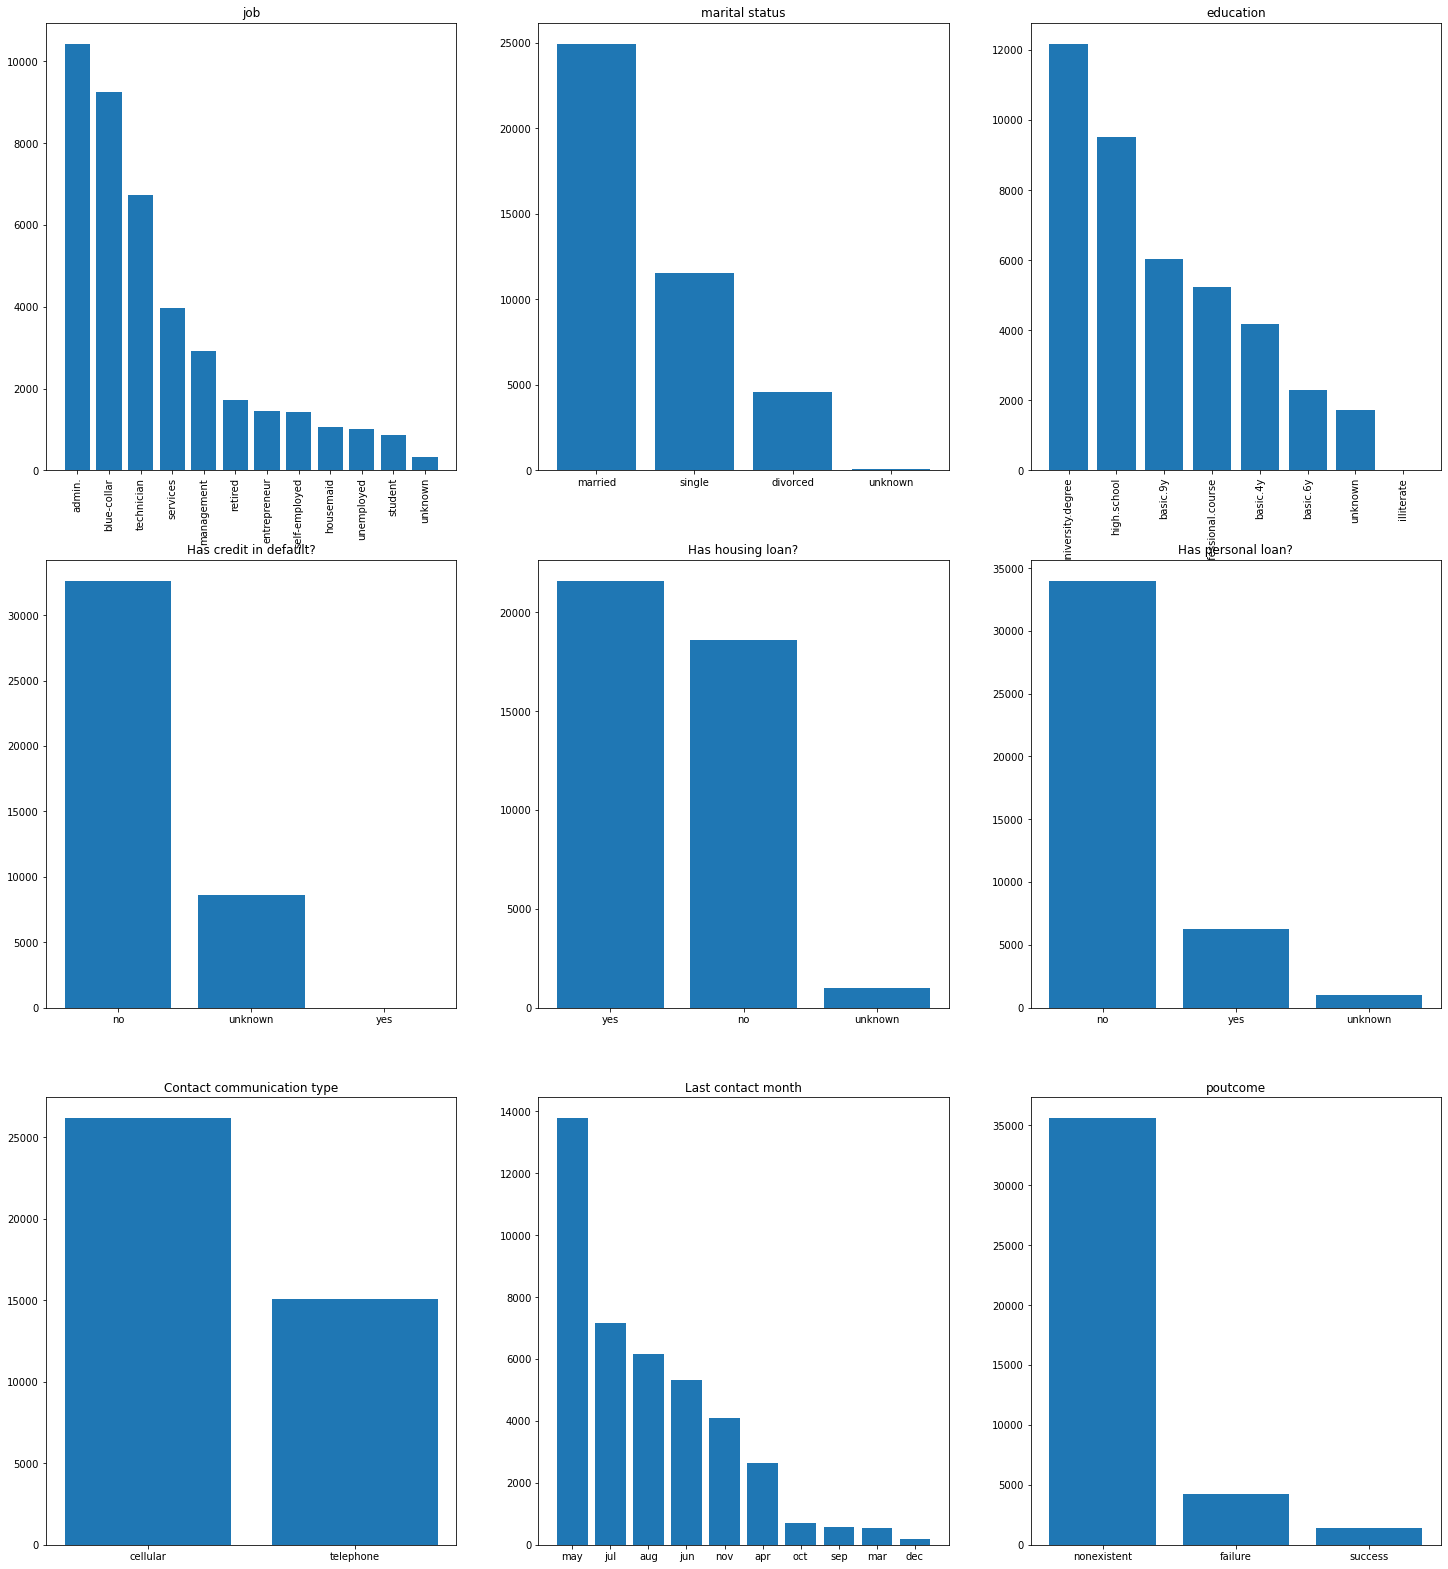

In [11]:
fig, axs = plt.subplots(3, 3, figsize = (25, 28))

axs[0][0].bar(x = bank["job"].value_counts().index,
          height = bank.job.value_counts().values)
axs[0][0].set_title("job")
axs[0][0].tick_params(axis = 'x', rotation=90)

axs[0][1].bar(x = bank["marital"].value_counts().index,
          height = bank.marital.value_counts().values)
axs[0][1].set_title("marital status")

axs[0][2].bar(x = bank["education"].value_counts().index,
          height = bank.education.value_counts().values)
axs[0][2].set_title("education")
axs[0][2].tick_params(axis = 'x', rotation=90)

axs[1][0].bar(x = bank["default"].value_counts().index,
          height = bank.default.value_counts().values)
axs[1][0].set_title("Has credit in default?")

axs[1][1].bar(x = bank["housing"].value_counts().index,
          height = bank.housing.value_counts().values)
axs[1][1].set_title("Has housing loan?")

axs[1][2].bar(x = bank["loan"].value_counts().index,
          height = bank.loan.value_counts().values)
axs[1][2].set_title("Has personal loan?")

axs[2][0].bar(x = bank["contact"].value_counts().index,
          height = bank.contact.value_counts().values)
axs[2][0].set_title("Contact communication type")

axs[2][1].bar(x = bank["month"].value_counts().index,
          height = bank.month.value_counts().values)
axs[2][1].set_title("Last contact month")

axs[2][2].bar(x = bank["poutcome"].value_counts().index,
          height = bank.poutcome.value_counts().values)
axs[2][2].set_title("poutcome")

plt.show()

##### There are no null values but there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values are treated as a possible class label.

#####  The data is highly biased in attribute "default", value count of "no" is 32588 while value count of "yes" is only 3, and there are 8597 unknown values as well, splitting the dataset using stratify with attribute "default" to ensure that the test set and the train set have the same imbalance as seen in the original data.

### Split train and test set

In [12]:
X = bank.drop("y", axis = 1)
y = bank["y"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = bank["default"], random_state = seed)

### Feature Scaling and One Hot Encoding

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

cat_attr = list(bank.columns[1:10]) + ["poutcome"]
num_attr = ["age"] +  list(bank.columns[10:13]) + list(bank.columns[14:19])

pipeline = ColumnTransformer([
    ("num", MinMaxScaler(), num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

X_train_ES = pipeline.fit_transform(X_train)

y_train = y_train.map({"yes" : 1, "no" : 0})

In [15]:
X_train_ES.shape

(32950, 62)

#### Transform test set

In [16]:
X_test_ES = pipeline.transform(X_test)
y_test = y_test.map({"yes" : 1, "no" : 0})

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_split = 45, max_depth = 8, class_weight = "balanced", 
                                 criterion = "entropy", random_state = seed)

start_time = time.perf_counter()
tree_clf.fit(X_train_ES, y_train)
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, "sec")

Time taken:  0.28086120000000037 sec


#### Evaluating on test set

In [18]:
tree_pred = tree_clf.predict(X_test_ES)

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, accuracy_score, fbeta_score

print("F1 score: ", f1_score(y_test, tree_pred))
print("Recall: ", recall_score(y_test, tree_pred))
print("Precision: ", precision_score(y_test, tree_pred))
print("Accuracy: ", accuracy_score(y_test, tree_pred))
print("F Beta Score: ", fbeta_score(y_test, tree_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, tree_pred))

F1 score:  0.4540796216003153
Recall:  0.6322722283205269
Precision:  0.35424354243542433
Accuracy:  0.8318766690944404
F Beta Score:  0.6043698308850758
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7327
           1       0.35      0.63      0.45       911

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



### Tuning hyperparameters with Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

param_grid = [
    {"criterion" : ["entropy", "gini"], "min_samples_split" : [45, 50, 60, 70], "max_depth" : [7, 8, 10]}
]

scorer = make_scorer(fbeta_score, beta = 4)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state = seed)
grid_search = GridSearchCV(tree, param_grid, cv = 5, scoring = scorer, return_train_score = True)

grid_search.fit(X_train_ES, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=58),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [7, 8, 10],
                          'min_samples_split': [45, 50, 60, 70]}],
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=4))

#### Cross validation scores on train set

In [21]:
grid_cvres = grid_search.cv_results_

for mean_score, params in zip(grid_cvres["mean_test_score"], grid_cvres["params"]):
    print(mean_score, params)

0.5791125090740354 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 45}
0.5790941025409697 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 50}
0.5798104293163522 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 60}
0.5797932632363813 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 70}
0.5771030608447931 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 45}
0.5770666297425766 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}
0.5783262997787946 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 60}
0.5794508943269692 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 70}
0.569607380449212 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 45}
0.5712673380788972 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50}
0.5738101863719244 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 60}
0.5756886609811923 {'criterion': 'entropy', 'max_depth': 10, 'm

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=70, random_state=58)

#### Best Decision Tree Model after tuning

In [23]:
tree_best_model = grid_search.best_estimator_

start_time = time.perf_counter()
tree_best_model.fit(X_train_ES, y_train)
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, "sec")

Time taken:  0.2988548999999949 sec


#### Evaluating on test set

In [24]:
tree_best_pred = tree_best_model.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, tree_best_pred))
print("Recall: ", recall_score(y_test, tree_best_pred))
print("Precision: ", precision_score(y_test, tree_best_pred))
print("Accuracy: ", accuracy_score(y_test, tree_best_pred))
print("F Beta Score: ", fbeta_score(y_test, tree_best_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, tree_best_pred))

F1 score:  0.4537947306331105
Recall:  0.6333699231613611
Precision:  0.35355392156862747
Accuracy:  0.8313911143481427
F Beta Score:  0.605194965449161
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7327
           1       0.35      0.63      0.45       911

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



#### Confusion matrix

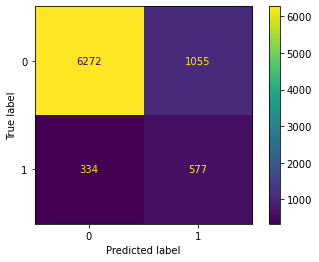

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_tree = confusion_matrix(y_test, tree_best_pred, labels = tree_best_model.classes_)
cm_disp_tree = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = tree_best_model.classes_)
cm_disp_tree.plot()
plt.show()

## Naive Bayes Classifier

### Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()

start_time = time.perf_counter()
gauss_nb.fit(X_train_ES, y_train)
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, "sec")

Time taken:  0.03522289999999373 sec


#### Evaluating on test set

In [27]:
gauss_pred = gauss_nb.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, gauss_pred))
print("Recall: ", recall_score(y_test, gauss_pred))
print("Precision: ", precision_score(y_test, gauss_pred))
print("Accuracy: ", accuracy_score(y_test, gauss_pred))
print("F Beta Score: ", fbeta_score(y_test, gauss_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, gauss_pred))

F1 score:  0.4039688164422396
Recall:  0.6256860592755215
Precision:  0.29827315541601257
Accuracy:  0.7958242291818403
F Beta Score:  0.587735791835992
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      7327
           1       0.30      0.63      0.40       911

    accuracy                           0.80      8238
   macro avg       0.62      0.72      0.64      8238
weighted avg       0.87      0.80      0.82      8238



#### Confusion matrix

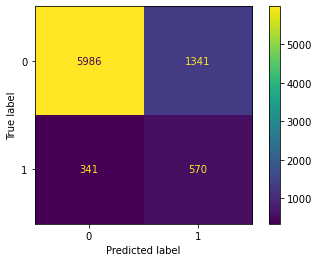

In [28]:
cm_gauss = confusion_matrix(y_test, gauss_pred, labels = gauss_nb.classes_)
cm_disp_gauss = ConfusionMatrixDisplay(confusion_matrix = cm_gauss, display_labels = gauss_nb.classes_)
cm_disp_gauss.plot()
plt.show()

## Ensemble Classifiers

## Bagging with Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 200, max_features = "log2", min_samples_split = 80, 
                                   class_weight = "balanced", random_state = seed)

forest_clf.fit(X_train_ES, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=80, n_estimators=200, random_state=58)

#### Performance on test set

In [30]:
forest_pred = forest_clf.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, forest_pred))
print("Recall: ", recall_score(y_test, forest_pred))
print("Precision: ", precision_score(y_test, forest_pred))
print("Accuracy: ", accuracy_score(y_test, forest_pred))
print("F Beta Score: ", fbeta_score(y_test, forest_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, forest_pred))

F1 score:  0.48780487804878053
Recall:  0.6256860592755215
Precision:  0.3997194950911641
Accuracy:  0.8546977421704297
F Beta Score:  0.605549306336708
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7327
           1       0.40      0.63      0.49       911

    accuracy                           0.85      8238
   macro avg       0.67      0.75      0.70      8238
weighted avg       0.89      0.85      0.87      8238



### Tuning hyperparameters with Grid Search

In [31]:
param_grid = [
    {"n_estimators" : [150, 200], "max_features" : ["log2", 8], "min_samples_split" : [70, 80, 90, 100]}
]

forest_clf = RandomForestClassifier(class_weight = "balanced", random_state = seed)

grid_forest_search = GridSearchCV(forest_clf, param_grid, cv = 5, 
                           scoring = scorer, return_train_score = True)

grid_forest_search.fit(X_train_ES, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=58),
             param_grid=[{'max_features': ['log2', 8],
                          'min_samples_split': [70, 80, 90, 100],
                          'n_estimators': [150, 200]}],
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=4))

#### Cross validation scores on train set

In [32]:
forest_cvres = grid_forest_search.cv_results_

for mean_score, params in zip(forest_cvres["mean_test_score"], forest_cvres["params"]):
    print(mean_score, params)

0.5927482555901437 {'max_features': 'log2', 'min_samples_split': 70, 'n_estimators': 150}
0.5922705273139389 {'max_features': 'log2', 'min_samples_split': 70, 'n_estimators': 200}
0.5924067021443763 {'max_features': 'log2', 'min_samples_split': 80, 'n_estimators': 150}
0.5936454232089642 {'max_features': 'log2', 'min_samples_split': 80, 'n_estimators': 200}
0.5939300849597424 {'max_features': 'log2', 'min_samples_split': 90, 'n_estimators': 150}
0.593621069635819 {'max_features': 'log2', 'min_samples_split': 90, 'n_estimators': 200}
0.5948920108950269 {'max_features': 'log2', 'min_samples_split': 100, 'n_estimators': 150}
0.5946586704100396 {'max_features': 'log2', 'min_samples_split': 100, 'n_estimators': 200}
0.5928396772242749 {'max_features': 8, 'min_samples_split': 70, 'n_estimators': 150}
0.5926511182669386 {'max_features': 8, 'min_samples_split': 70, 'n_estimators': 200}
0.5955665527261893 {'max_features': 8, 'min_samples_split': 80, 'n_estimators': 150}
0.5948188565194424 {'max

#### Best Random forest model after tuning

In [33]:
grid_forest_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features=8,
                       min_samples_split=100, n_estimators=150,
                       random_state=58)

#### Evaluating on test set

In [34]:
forest_best_model = grid_forest_search.best_estimator_

start_time = time.perf_counter()
forest_best_model.fit(X_train_ES, y_train)
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, "sec")

Time taken:  5.9074247000000355 sec


In [35]:
forest_best_pred = forest_best_model.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, forest_best_pred))
print("Recall: ", recall_score(y_test, forest_best_pred))
print("Precision: ", precision_score(y_test, forest_best_pred))
print("Accuracy: ", accuracy_score(y_test, forest_best_pred))
print("F Beta Score: ", fbeta_score(y_test, forest_best_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, forest_best_pred))

F1 score:  0.49121303043291903
Recall:  0.6289791437980241
Precision:  0.4029535864978903
Accuracy:  0.8559116290361738
F Beta Score:  0.6088886110763845
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7327
           1       0.40      0.63      0.49       911

    accuracy                           0.86      8238
   macro avg       0.68      0.76      0.70      8238
weighted avg       0.89      0.86      0.87      8238



#### Confusion matrix

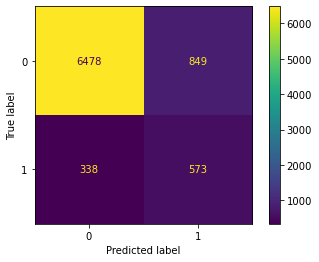

In [36]:
cm_forest = confusion_matrix(y_test, forest_best_pred, labels = forest_best_model.classes_)
cm_disp_forest = ConfusionMatrixDisplay(confusion_matrix = cm_forest, display_labels = forest_best_model.classes_)
cm_disp_forest.plot()
plt.show()

#### Feature Importance

In [37]:
feature_importances = forest_best_model.feature_importances_

cat_encoder = pipeline.named_transformers_["cat"]
cat_one_hot_attr = list(cat_encoder.categories_[0])
attributes = num_attr + cat_one_hot_attr

sorted(zip(feature_importances, attributes), reverse = True)

[(0.16450966666634792, 'euribor3m'),
 (0.15304445122320834, 'nr.employed'),
 (0.0871454957992802, 'emp.var.rate'),
 (0.05889624659218209, 'cons.conf.idx'),
 (0.05439678138462153, 'age'),
 (0.04667062792575191, 'cons.price.idx'),
 (0.04161349170415633, 'pdays'),
 (0.030643291097434747, 'campaign'),
 (0.020171580115971626, 'previous'),
 (0.008653520074512743, 'blue-collar'),
 (0.006083803922649327, 'retired'),
 (0.0059898085558334315, 'admin.'),
 (0.005735715248443569, 'services'),
 (0.005321695526153763, 'technician'),
 (0.0050982594543449965, 'entrepreneur'),
 (0.005047467011044944, 'management'),
 (0.004612796595418046, 'self-employed'),
 (0.003614272681450302, 'housemaid'),
 (0.0032951002239461733, 'student'),
 (0.0026848022716366936, 'unemployed'),
 (0.0014678500756886296, 'unknown')]

## Boosting with Decision Stumps

In [38]:
from sklearn.ensemble import AdaBoostClassifier

model = DecisionTreeClassifier(max_depth = 1, class_weight = "balanced", random_state = seed)
boosting = AdaBoostClassifier(model, n_estimators = 200, learning_rate = 0.4)

boosting.fit(X_train_ES, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=58),
                   learning_rate=0.4, n_estimators=200)

#### Performance on test set

In [39]:
boost_pred = boosting.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, boost_pred))
print("Recall: ", recall_score(y_test, boost_pred))
print("Precision: ", precision_score(y_test, boost_pred))
print("Accuracy: ", accuracy_score(y_test, boost_pred))
print("F Beta Score: ", fbeta_score(y_test, boost_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, boost_pred))

F1 score:  0.45541523153463453
Recall:  0.6531284302963776
Precision:  0.3495887191539365
Accuracy:  0.8272638990046127
F Beta Score:  0.6213908342548223
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      7327
           1       0.35      0.65      0.46       911

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.89      0.83      0.85      8238



### Tuning hyperparameters with Grid Search

In [40]:
param_grid_boost = [
    {"n_estimators" : [150, 200, 250], "learning_rate" : [0.2, 0.5, 0.8, 1.0]}
]

base_estimator = DecisionTreeClassifier(max_depth = 1, class_weight = "balanced", random_state = seed)
adaboost = AdaBoostClassifier(base_estimator)
grid_boost_search = GridSearchCV(adaboost, param_grid_boost, cv = 5, scoring = scorer)

grid_boost_search.fit(X_train_ES, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1,
                                                                                random_state=58)),
             param_grid=[{'learning_rate': [0.2, 0.5, 0.8, 1.0],
                          'n_estimators': [150, 200, 250]}],
             scoring=make_scorer(fbeta_score, beta=4))

#### Cross validation scores on train set

In [41]:
boost_cvres = grid_boost_search.cv_results_

for mean_score, params in zip(boost_cvres["mean_test_score"], boost_cvres["params"]):
    print(mean_score, params)

0.5935510422123957 {'learning_rate': 0.2, 'n_estimators': 150}
0.5951457624491672 {'learning_rate': 0.2, 'n_estimators': 200}
0.5983425013293222 {'learning_rate': 0.2, 'n_estimators': 250}
0.6062451302393362 {'learning_rate': 0.5, 'n_estimators': 150}
0.6085415874634054 {'learning_rate': 0.5, 'n_estimators': 200}
0.6091969046234398 {'learning_rate': 0.5, 'n_estimators': 250}
0.607447033477403 {'learning_rate': 0.8, 'n_estimators': 150}
0.6084991422793372 {'learning_rate': 0.8, 'n_estimators': 200}
0.6102659775160315 {'learning_rate': 0.8, 'n_estimators': 250}
0.6111631871898302 {'learning_rate': 1.0, 'n_estimators': 150}
0.6111854830377587 {'learning_rate': 1.0, 'n_estimators': 200}
0.6113689632051195 {'learning_rate': 1.0, 'n_estimators': 250}


In [42]:
grid_boost_search.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=58),
                   n_estimators=250)

#### Evaluating on test set

In [43]:
boost_best_model = grid_boost_search.best_estimator_

start_time = time.perf_counter()
boost_best_model.fit(X_train_ES, y_train)
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, "sec")

Time taken:  15.279631000000109 sec


In [44]:
boost_best_pred = boost_best_model.predict(X_test_ES)

print("F1 score: ", f1_score(y_test, boost_best_pred))
print("Recall: ", recall_score(y_test, boost_best_pred))
print("Precision: ", precision_score(y_test, boost_best_pred))
print("Accuracy: ", accuracy_score(y_test, boost_best_pred))
print("F Beta Score: ", fbeta_score(y_test, boost_best_pred, beta = 4))
print("Classification report: \n", classification_report(y_test, boost_best_pred))

F1 score:  0.4524264424914023
Recall:  0.6498353457738749
Precision:  0.347010550996483
Accuracy:  0.8260500121388686
F Beta Score:  0.6181058837980593
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      7327
           1       0.35      0.65      0.45       911

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.67      8238
weighted avg       0.88      0.83      0.85      8238



#### Confusion matrix

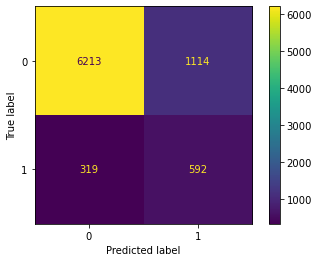

In [45]:
cm_boost = confusion_matrix(y_test, boost_best_pred, labels = boost_best_model.classes_)
cm_disp_boost = ConfusionMatrixDisplay(confusion_matrix = cm_boost, display_labels = boost_best_model.classes_)
cm_disp_boost.plot()
plt.show()